In [ ]:
# dataSource=['EgyptianNotEgypt.gb']
# filh=open('EgyptianNotEgypt.gb')
# for i in filh:
        if i.startswith('ACCESSION'):
            x=i.split()
            new_record =x[1]
            print(new_record)
    

In [36]:
def process_record (record):
    #record=open(file_name)
    #count=0
    new_record= {'Accession':[],'Strain':[],'Pubmed':[],'genotype':[],'subtype':[],'Version':[],'isolation_source':[],'country':[],'isolate':[],'CDS_bp_count':[],'gene':[]}
    gene_of_interest=['NS5B','NS5A protein ','NS5B protein ','nonstructural protein 5B F','NS5b','non-structural protein 5B','NS5B RNA dependent RNA polymerase','nonstructural protein 5b','NSB5 protein','nonstructural protein 5A','NS3 protein','NS5A','NS3 protease','RNA-dependent RNA polymerase','NS3','nonstructural protein 5','NS5','NS5a','NS3 protease/helicase','NS5B RNA-dependent RNA polymerase']
    temp=''
    for i in record:
        i=i.lstrip()
        if i.startswith('ACCESSION'):
            x=i.split()
            new_record['Accession'].append(x[1])
        elif i.startswith('LOCUS'):
            i=i.split()
            new_record['CDS_bp_count'].append(i[2])    
        elif i.startswith('VERSION'):
            new_record['Version'].append(i[12:])

        elif i.startswith('/country='):
            new_record['country'].append(i[10:-1])
            
        elif i.startswith('/isolation_source'):
            new_record['isolation_source'].append(i[19:-1])
            
        elif i.startswith('/strain='):
            new_record['Strain'].append(i[9:-1])
        
        elif i.startswith('PUBMED'):
             new_record['Pubmed'].append(i[8:-1])
        elif i.startswith('/isolate='):
            new_record['isolate'].append(i[10:-1])
        elif i.startswith('/product='):
            temp=i[10:-1]
            if temp in gene_of_interest:
                new_record['gene'].append(temp)
        elif i.startswith('/gene='):
            temp=i[7:-1]
            if temp in gene_of_interest:
                new_record['gene'].append(temp)
        elif i.startswith('/note='):
            if 'subtype' in i:
                f=i.split()
                new_record['subtype'].append(f[1])
            else:
                x=i.find('gen')
                if x>0:
                    i=i[x:-1]
                    y=i.split(':')
                    new_record['genotype'].append(y[-1])
    return  new_record;

In [3]:
dataSource=['EgyptianNotEgypt.gb','EgyptNotEgyptian.gb']
record = []
for x in dataSource:
    filh=open(x)
    for line in filh:
        line=line.lstrip()
        line=line.rstrip()
        if (not line.startswith('//')):
#             print(line)
            record.append(line)
        else:
            result=process_record(record)
            continue

In [7]:
print(result)

{'Accession': ['U31256', 'U31255', 'JN564688', 'JN564687', 'JN564686', 'JN564685', 'JN564684', 'JN564683', 'JN564682', 'JN564681', 'JN564680', 'JN564679', 'AB726066', 'AB726065', 'AB726064', 'AB726063', 'AB726062', 'AB726061', 'AB726060', 'AB726059', 'AB726058', 'AB726057', 'AB726056', 'AB726055', 'AB726054', 'AB726053', 'AB726052', 'AB726051', 'AB726050', 'AB726049', 'AB726048', 'AB726047', 'AB726046', 'AB726045', 'AB726044', 'AB726043', 'AB726042', 'AB726041', 'AB726040', 'AB726039', 'AB726038', 'AB726037', 'AB726036', 'AB726035', 'AB726034', 'AB726033', 'AB726032', 'AB726031', 'AB726030', 'AB726029', 'AB726028', 'AB726027', 'AB726026', 'AB726025', 'AB726024', 'AB726023', 'AB726022', 'AB726021', 'AB726020', 'AB726019', 'AB726018', 'AB726017', 'AB726016', 'AB726015', 'AB726014', 'AB726013', 'AB726012', 'AB726011', 'AB726010', 'AB726009', 'AB726008', 'AB726007', 'AB726006', 'AB726005', 'AB726004', 'AB726003', 'AB726002', 'AB726001', 'AB726000', 'AB725999', 'AB725998', 'AB725997', 'AB72

In [4]:
d = dict()
for c in result['gene']:
    if c not in d:
        d[c] = 1 
    else:
        d[c] = d[c] + 1
print(d)


{'core protein': 187, 'Core protein': 37, 'NS5A protein': 45, 'NS5B': 205, 'core/E1': 218, 'HCV G4': 4, 'truncated polyprotein': 2, 'NS5b': 78, 'RNA dependant RNA polymerase': 7, 'e1': 2, 'envelope glycoprotein E1': 1, 'nonstructural protein 5B': 120, 'non-structural protein 5B': 2, 'E1': 27, 'envelope protein': 1, 'NS5B RNA dependent RNA polymerase': 3, 'NS5B protein': 3, 'nonstructural protein 5b': 130, 'NSB5 protein': 48, 'nonstructural protein 5A': 3, 'NS3 protein': 12, 'NS5A': 1, 'envelope glycoprotein': 1, 'NS3 protease': 1, 'RNA-dependent RNA polymerase': 3, 'Core': 1, 'E2': 1, 'P7': 1, 'NS2': 1, 'NS3': 3, 'NS4a': 1, 'NS4b': 1, 'NS5a': 1, 'NS5': 6, 'nonstructural protein 5': 3, 'E1 protein': 2, 'E2 protein': 2, 'p7 protein': 2, 'NS2 protein': 2, 'NS3 protease/helicase': 2, 'NS4A protein': 2, 'NS4B protein': 2, 'NS5B RNA-dependent RNA polymerase': 2}


In [8]:
import pandas as pd

In [9]:
from matplotlib import pyplot as plt

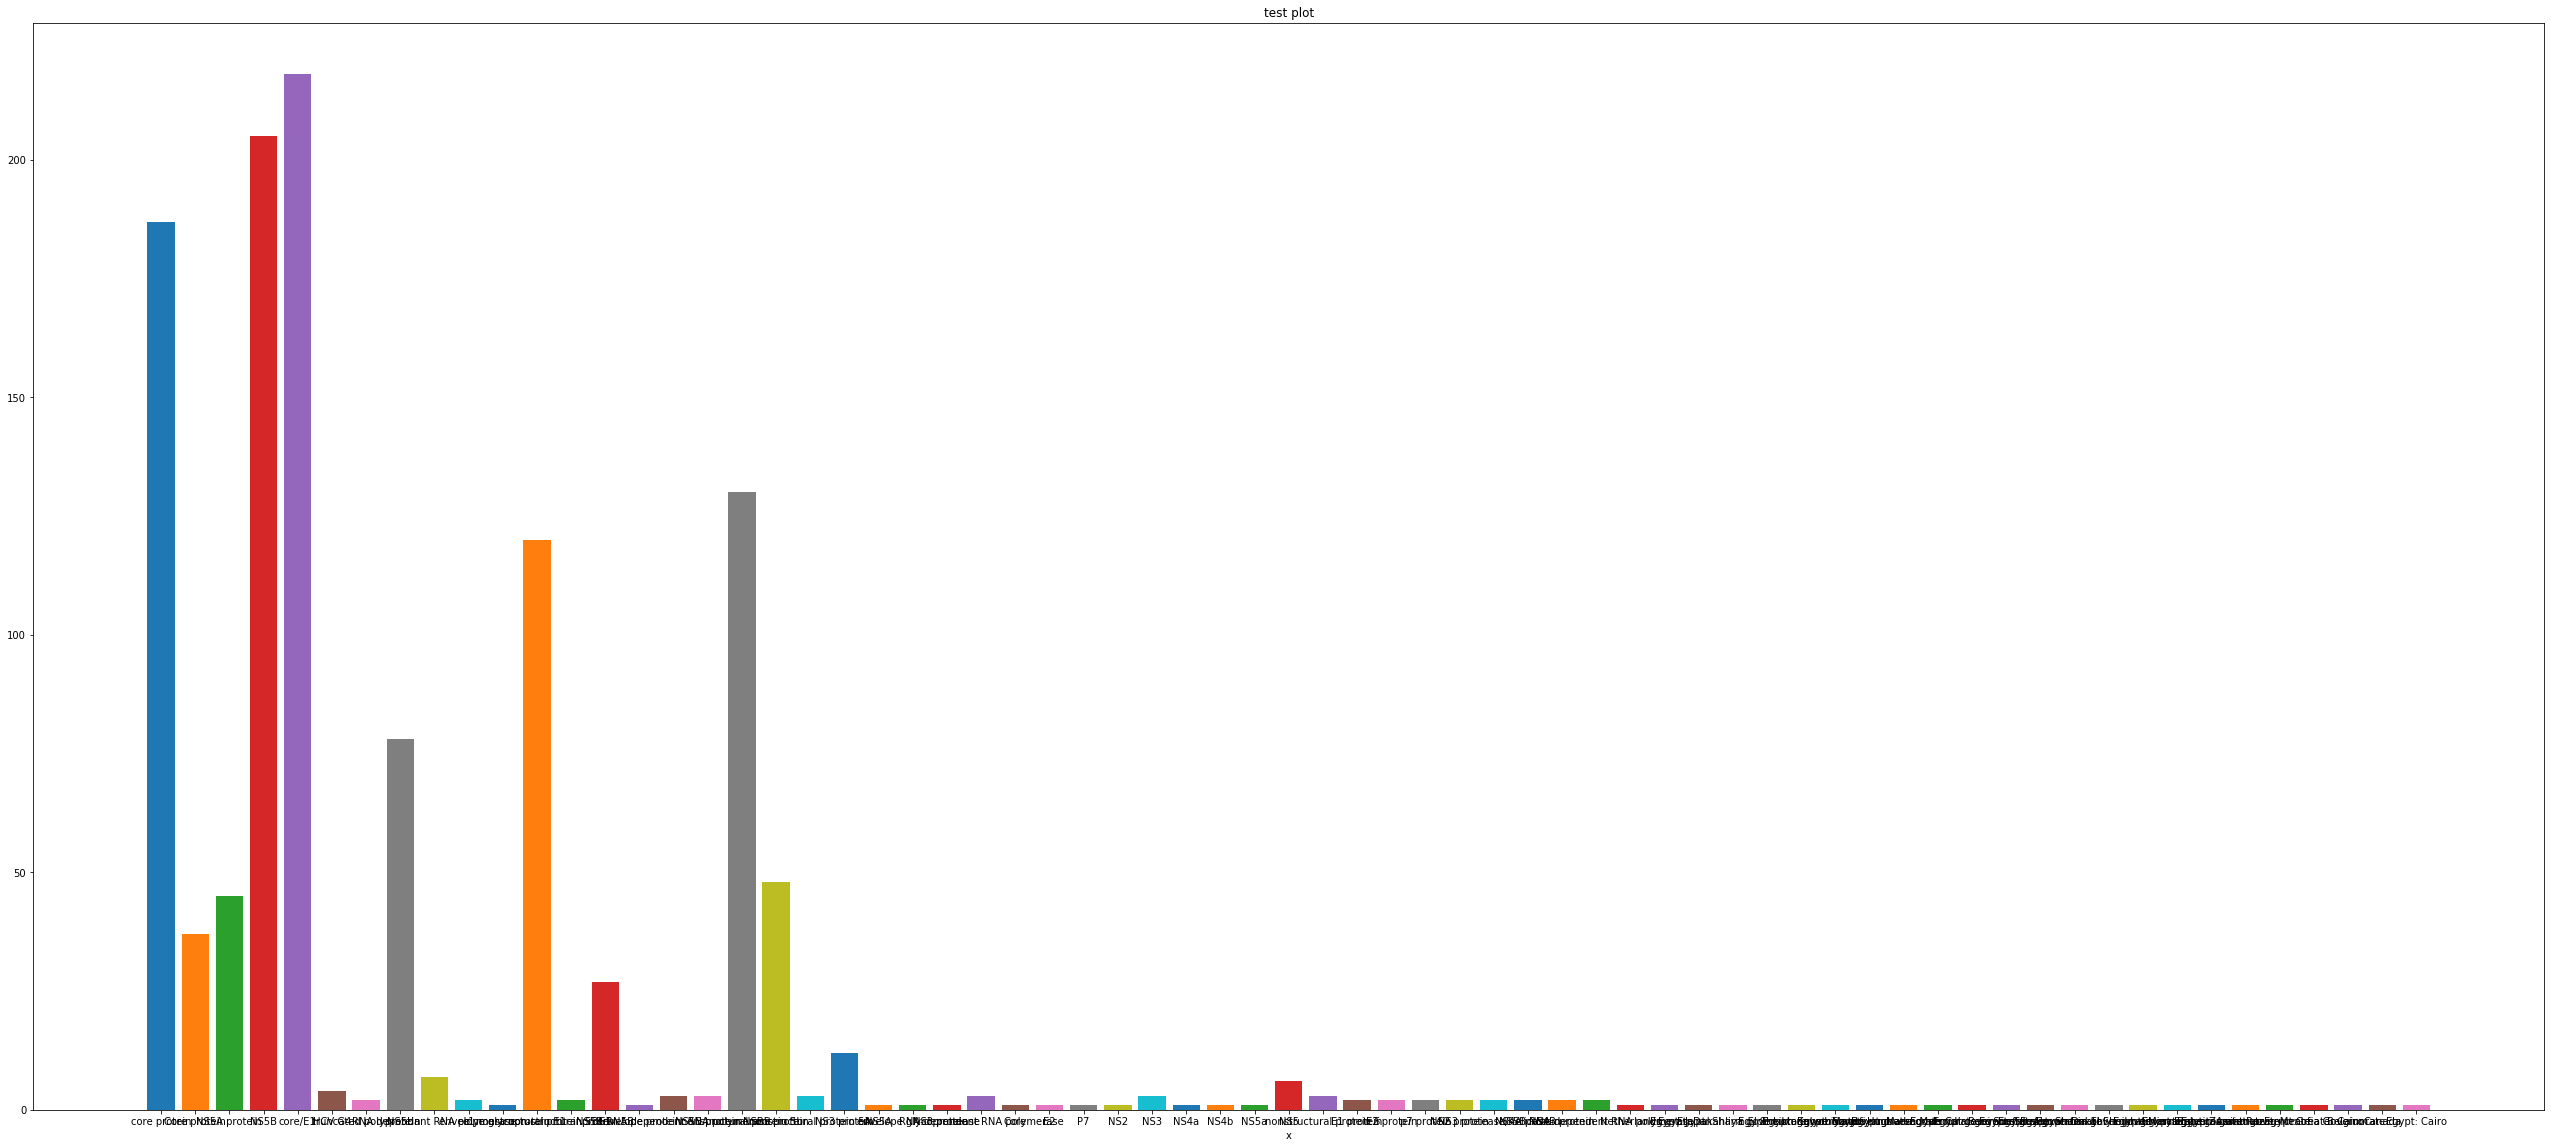

In [35]:
for key in d:
    x =key 
    y =d[key]
    plt.bar(x, y)
    plt.title("test plot")
    plt.xlabel("x")
plt.show()

In [17]:
con = dict()
for z in result['country']:
    if z not in con:
        con[z] = 1 
    else:
        con[z] = con[z] + 1
print(con)
#print(result['country'])

{'Netherlands': 51, 'Egypt': 992, 'Japan': 1, 'Egypt: Dakahliya governorate': 4, 'Egypt: Sharm El Sheikh governorate': 9, 'Egypt: Luxor governorate': 12, 'Egypt: Kalyobiya governorate': 6, 'Egypt: Monofiya governorate': 8, 'Egypt: Hughada governorate': 8, 'Egypt: Marsa Matrouh governorate': 3, 'Egypt: Cairo governorate': 9, 'Egypt: Beni Suef governorate': 5, 'Egypt: Suez governorate': 6, 'Egypt: Alexandria governorate': 5, 'Egypt: Dakahlya governorate': 3, 'Egypt: Sharm El Sheikh governorate governorate': 1, 'Egypt: Minya governorate': 5, 'Egypt: Beheira governorate': 5, 'Egypt: Assiut governorate': 6, 'Egypt: Zawiat Razin, Menofia Governorate': 205, 'Egypt:Greater Cairo': 48, 'Belgium': 2, 'Canada': 1, 'Egypt: Cairo': 1}


In [33]:
plt.rcParams['figure.figsize']=[45,20]

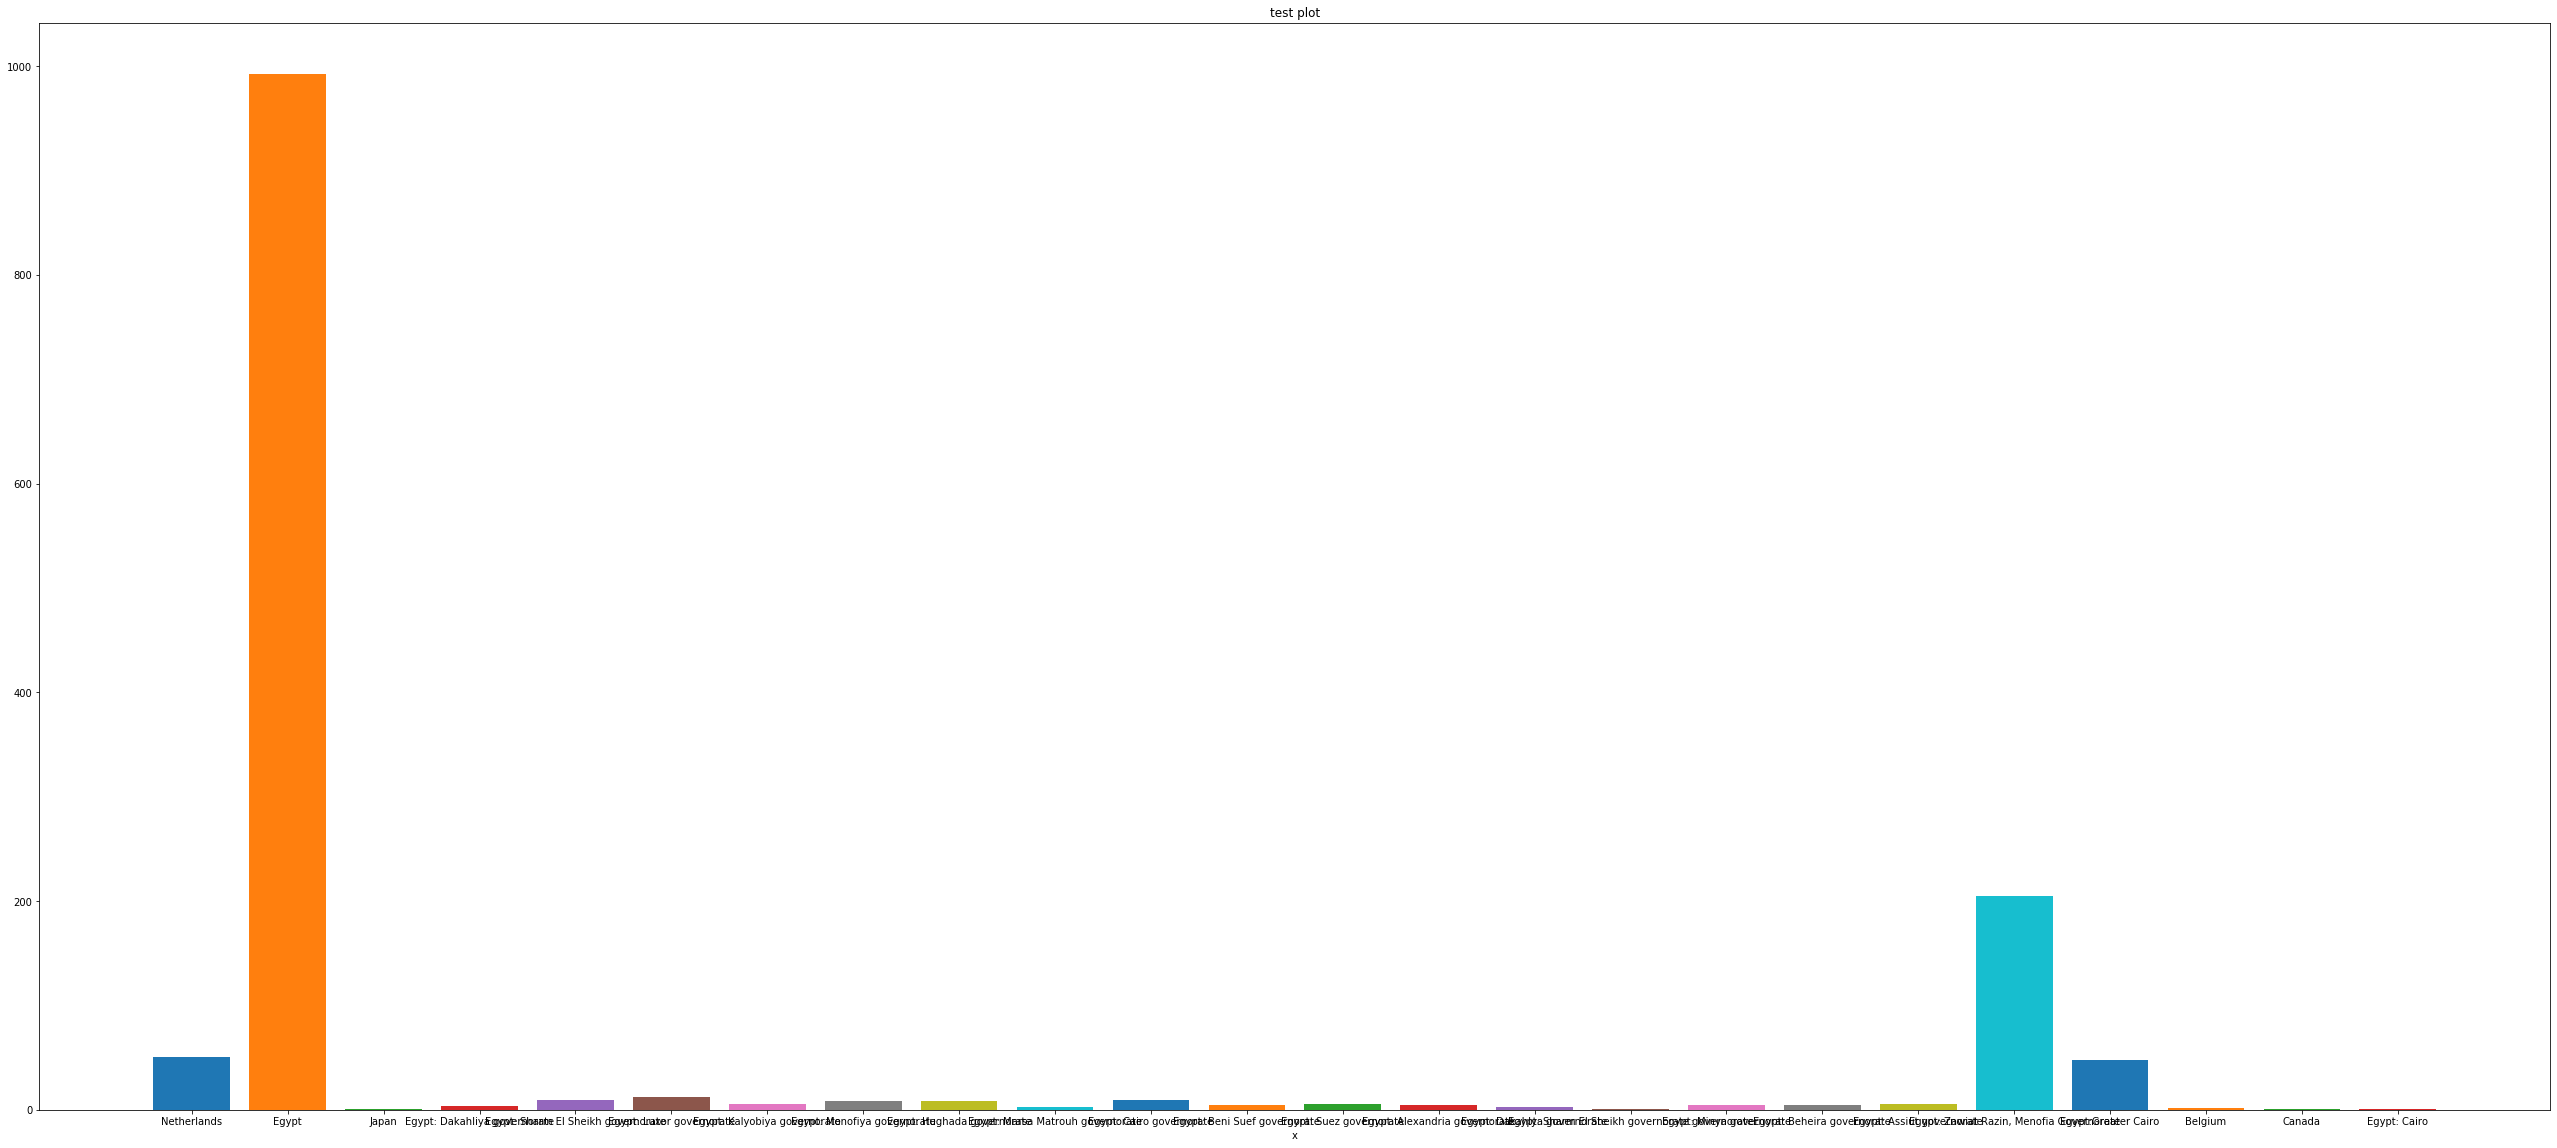

In [34]:
for key in con:
    x =key 
    y =con[key]
    plt.bar(x, y)
    plt.title("test plot")
    plt.xlabel("x")
plt.show()